# __Understanding Consumer Perception of Dot & Key Moisturizers: A Comparative NLP-Driven Review Analysis__

> Using Flipkart reviews as a data source, this project investigates how customers perceive Four Dot & Key moisturizer cream variants. The analysis involves comprehensive NLP methods such as preprocessing, NER, sentiment analytics, TF-IDF, and LDA topic modelling. The findings compare each product’s performance based on sentiment, feature mentions, and thematic patterns, offering actionable insights for product improvement and customer satisfaction.

__Prepared by:__ Divya Bothra (MBA24077)

## Web Scraping

### 1. Dot & Key Vitamin C + E Sorbet Super Bright Moisturizer (Orange)

In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

/opt/anaconda3/envs/bertopic_env/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [15]:
raw_url = "https://www.flipkart.com/philips-hp8100-60-hair-dryer/product-reviews/itmff6qnhzbshgwt?pid=HDRFF2VTK5ZWYV63&lid=LSTHDRFF2VTK5ZWYV63IDZNFY&aid=overall&certifiedBuyer=false&sortOrder=MOST_HELPFUL"


target_reviews = 5000
sort_options = ["MOST_RECENT", "NEGATIVE_FIRST", "POSITIVE_FIRST", "MOST_HELPFUL"]
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

In [20]:
try:
    base_part = raw_url.split("?")[0]
    # Extract only the PID parameter (Product ID)
    params = raw_url.split("?")[1].split("&")
    pid_param = next(p for p in params if p.startswith("pid="))
    
    # Reconstruct the cleanest possible URL
    clean_url = f"{base_part}?{pid_param}"
    print(f"URL successfully cleaned to: {clean_url}")
except Exception as e:
    print("Warning: Could not clean URL automatically. Using raw URL (sorting might fail).")
    clean_url = raw_url

unique_reviews = {}

URL successfully cleaned to: https://www.flipkart.com/philips-hp8100-60-hair-dryer/product-reviews/itmff6qnhzbshgwt?pid=HDRFF2VTK5ZWYV63


In [16]:
for sort_by in sort_options:
    print(f"\n>>> Scraping by SORT MODE: {sort_by}")
    
    consecutive_duplicate_pages = 0
    
    # Loop pages 1 to 50 (Flipkart limit)
    for page_num in range(1, 51): 
        
        # Build URL: Clean Base + Sort + Page
        url = f"{clean_url}&sortOrder={sort_by}&page={page_num}"
        
        try:
            page = requests.get(url, headers=headers, timeout=10)
            soup = BeautifulSoup(page.content, 'html.parser')
        except:
            print("  - Connection Error. Retrying...")
            time.sleep(5)
            continue

        review_boxes = soup.find_all('div', class_="col x_CUu6 QccLnz")
        
        if not review_boxes:
            print(f"  - No reviews found on Page {page_num}. Ending {sort_by}.")
            break

        new_on_this_page = 0
        
        for box in review_boxes:
            try:
                # --- CLASS: RATING ---
                rating_div = box.find('div', class_="MKiFS6")
                rating = rating_div.text.strip() if rating_div else "N/A"

                # --- CLASS: REVIEW TEXT ---
                comment_div = box.find('div', class_="G4PxIA")
                # Clean up "READ MORE"
                full_text = comment_div.text.replace('READ MORE', '').strip() if comment_div else "N/A"

                # --- CLASS: NAME ---
                name_p = box.find('p', class_="zJ1ZGa") # Using the first part of "zJ1ZGa ZDi3w2" is safer
                name = name_p.text.strip() if name_p else "Guest"
                
                # --- UNIQUE ID ---
                # Create a fingerprint to avoid duplicates across different sort orders
                review_id = f"{name}-{full_text[:40]}"
                
                if review_id not in unique_reviews:
                    unique_reviews[review_id] = {
                        "Rating": rating,
                        "Review": full_text,
                        "Name": name,
                        "Source": sort_by
                    }
                    new_on_this_page += 1

            except Exception:
                continue

        print(f"  - Page {page_num}: Found {new_on_this_page} new reviews. (Total Unique: {len(unique_reviews)})")

        # Smart Stop: If we see 0 new reviews for 2 pages straight, move to next sort
        if new_on_this_page == 0:
            consecutive_duplicate_pages += 1
            if consecutive_duplicate_pages >= 2:
                print(f"  - Duplicates detected. Moving to next sort order.")
                break
        else:
            consecutive_duplicate_pages = 0 

        if len(unique_reviews) >= target_reviews:
            break
            
        time.sleep(random.uniform(1.75, 5))

    if len(unique_reviews) >= target_reviews:
        print("\nTarget Reached!")
        break


>>> Scraping by SORT MODE: MOST_RECENT
  - Page 1: Found 10 new reviews. (Total Unique: 10)
  - Page 2: Found 10 new reviews. (Total Unique: 20)
  - Page 3: Found 10 new reviews. (Total Unique: 30)
  - Page 4: Found 10 new reviews. (Total Unique: 40)
  - Page 5: Found 10 new reviews. (Total Unique: 50)
  - Page 6: Found 10 new reviews. (Total Unique: 60)
  - Page 7: Found 10 new reviews. (Total Unique: 70)
  - Page 8: Found 9 new reviews. (Total Unique: 79)
  - Page 9: Found 10 new reviews. (Total Unique: 89)
  - Page 10: Found 10 new reviews. (Total Unique: 99)
  - Page 11: Found 10 new reviews. (Total Unique: 109)
  - Page 12: Found 8 new reviews. (Total Unique: 117)
  - Page 13: Found 7 new reviews. (Total Unique: 124)
  - Page 14: Found 10 new reviews. (Total Unique: 134)
  - Page 15: Found 10 new reviews. (Total Unique: 144)
  - Page 16: Found 9 new reviews. (Total Unique: 153)
  - Page 17: Found 9 new reviews. (Total Unique: 162)
  - Page 18: Found 10 new reviews. (Total Unique:

In [41]:
#df = pd.DataFrame(list(unique_reviews.values()))
#df
#df.to_excel('orange.xlsx')

### 2. Dot & Key CICA Calming Skin Renewing Night Gel, For Oily, Acne Prone And Sensitive Skin (Green)

In [29]:
raw_url = "https://www.flipkart.com/dot-key-cica-calming-skin-renewing-night-gel-for-oily-acne-prone-sensitive/product-reviews/itm451eb895b2ac6?pid=MSCG794KYMTEXRUC&lid=LSTMSCG794KYMTEXRUCTANACQ&aid=overall&certifiedBuyer=false&sortOrder=MOST_HELPFUL"


target_reviews = 5000
sort_options = ["MOST_RECENT", "NEGATIVE_FIRST", "POSITIVE_FIRST", "MOST_HELPFUL"]
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

In [31]:
try:
    base_part = raw_url.split("?")[0]
    # Extract only the PID parameter (Product ID)
    params = raw_url.split("?")[1].split("&")
    pid_param = next(p for p in params if p.startswith("pid="))
    
    # Reconstruct the cleanest possible URL
    clean_url = f"{base_part}?{pid_param}"
    print(f"URL successfully cleaned to: {clean_url}")
except Exception as e:
    print("Warning: Could not clean URL automatically. Using raw URL (sorting might fail).")
    clean_url = raw_url

unique_reviews = {}

URL successfully cleaned to: https://www.flipkart.com/dot-key-cica-calming-skin-renewing-night-gel-for-oily-acne-prone-sensitive/product-reviews/itm451eb895b2ac6?pid=MSCG794KYMTEXRUC


In [33]:
for sort_by in sort_options:
    print(f"\n>>> Scraping by SORT MODE: {sort_by}")
    
    consecutive_duplicate_pages = 0
    
    # Loop pages 1 to 90
    for page_num in range(1, 91): 
        
        # Build URL: Clean Base + Sort + Page
        url = f"{clean_url}&sortOrder={sort_by}&page={page_num}"
        
        try:
            page = requests.get(url, headers=headers, timeout=10)
            soup = BeautifulSoup(page.content, 'html.parser')
        except:
            print("  - Connection Error. Retrying...")
            time.sleep(5)
            continue

        review_boxes = soup.find_all('div', class_="col x_CUu6 QccLnz")
        
        if not review_boxes:
            print(f"  - No reviews found on Page {page_num}. Ending {sort_by}.")
            break

        new_on_this_page = 0
        
        for box in review_boxes:
            try:
                # --- CLASS: RATING ---
                rating_div = box.find('div', class_="MKiFS6")
                rating = rating_div.text.strip() if rating_div else "N/A"

                # --- CLASS: REVIEW TEXT ---
                comment_div = box.find('div', class_="G4PxIA")
                # Clean up "READ MORE"
                full_text = comment_div.text.replace('READ MORE', '').strip() if comment_div else "N/A"

                # --- CLASS: NAME ---
                name_p = box.find('p', class_="zJ1ZGa") # Using the first part of "zJ1ZGa ZDi3w2" is safer
                name = name_p.text.strip() if name_p else "Guest"
                
                # --- UNIQUE ID ---
                # Create a fingerprint to avoid duplicates across different sort orders
                review_id = f"{name}-{full_text[:40]}"
                
                if review_id not in unique_reviews:
                    unique_reviews[review_id] = {
                        "Rating": rating,
                        "Review": full_text,
                        "Name": name,
                    }
                    new_on_this_page += 1

            except Exception:
                continue

        print(f"  - Page {page_num}: Found {new_on_this_page} new reviews. (Total Unique: {len(unique_reviews)})")

        # Smart Stop: If we see 0 new reviews for 2 pages straight, move to next sort
        if new_on_this_page == 0:
            consecutive_duplicate_pages += 1
            if consecutive_duplicate_pages >= 2:
                print(f"  - Duplicates detected. Moving to next sort order.")
                break
        else:
            consecutive_duplicate_pages = 0 

        if len(unique_reviews) >= target_reviews:
            break
            
        time.sleep(random.uniform(2, 3.5))

    if len(unique_reviews) >= target_reviews:
        print("\nTarget Reached!")
        break


>>> Scraping by SORT MODE: MOST_RECENT
  - Page 1: Found 10 new reviews. (Total Unique: 10)
  - Page 2: Found 10 new reviews. (Total Unique: 20)
  - Page 3: Found 10 new reviews. (Total Unique: 30)
  - Page 4: Found 10 new reviews. (Total Unique: 40)
  - Page 5: Found 10 new reviews. (Total Unique: 50)
  - Page 6: Found 10 new reviews. (Total Unique: 60)
  - Page 7: Found 10 new reviews. (Total Unique: 70)
  - Page 8: Found 9 new reviews. (Total Unique: 79)
  - Page 9: Found 9 new reviews. (Total Unique: 88)
  - Page 10: Found 10 new reviews. (Total Unique: 98)
  - Page 11: Found 10 new reviews. (Total Unique: 108)
  - Page 12: Found 10 new reviews. (Total Unique: 118)
  - Page 13: Found 9 new reviews. (Total Unique: 127)
  - Page 14: Found 8 new reviews. (Total Unique: 135)
  - Page 15: Found 9 new reviews. (Total Unique: 144)
  - Page 16: Found 9 new reviews. (Total Unique: 153)
  - Page 17: Found 8 new reviews. (Total Unique: 161)
  - Page 18: Found 10 new reviews. (Total Unique: 1

In [39]:
df2 = pd.DataFrame(list(unique_reviews.values()))
df2.head()
df2.to_excel('green.xlsx')

### 3. Dot & Key 72hrs Hydrating Gel Moisturizer + Probiotics Face Moisturizer for dry skin (Blue)

In [80]:
raw_url = "https://www.flipkart.com/dot-key-72hrs-hydrating-gel-moisturizer-probiotics-face-dry-skin/product-reviews/itm3033572e3ce5a?pid=MSCFZR5BR7CKMYKZ&lid=LSTMSCFZR5BR7CKMYKZGNIUOR&aid=overall&certifiedBuyer=false&sortOrder=MOST_HELPFUL"


target_reviews = 5000
sort_options = ["MOST_RECENT", "NEGATIVE_FIRST", "POSITIVE_FIRST", "MOST_HELPFUL"]
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

In [82]:
try:
    base_part = raw_url.split("?")[0]
    # Extract only the PID parameter (Product ID)
    params = raw_url.split("?")[1].split("&")
    pid_param = next(p for p in params if p.startswith("pid="))
    
    # Reconstruct the cleanest possible URL
    clean_url = f"{base_part}?{pid_param}"
    print(f"URL successfully cleaned to: {clean_url}")
except Exception as e:
    print("Warning: Could not clean URL automatically. Using raw URL (sorting might fail).")
    clean_url = raw_url

unique_reviews = {}

URL successfully cleaned to: https://www.flipkart.com/dot-key-72hrs-hydrating-gel-moisturizer-probiotics-face-dry-skin/product-reviews/itm3033572e3ce5a?pid=MSCFZR5BR7CKMYKZ


In [84]:
for sort_by in sort_options:
    print(f"\n>>> Scraping by SORT MODE: {sort_by}")
    
    consecutive_duplicate_pages = 0
    
    # Loop pages 1 to 150
    for page_num in range(1, 151): 
        
        # Build URL: Clean Base + Sort + Page
        url = f"{clean_url}&sortOrder={sort_by}&page={page_num}"
        
        try:
            page = requests.get(url, headers=headers, timeout=10)
            soup = BeautifulSoup(page.content, 'html.parser')
        except:
            print("  - Connection Error. Retrying...")
            time.sleep(5)
            continue

        review_boxes = soup.find_all('div', class_="col x_CUu6 QccLnz")
        
        if not review_boxes:
            print(f"  - No reviews found on Page {page_num}. Ending {sort_by}.")
            break

        new_on_this_page = 0
        
        for box in review_boxes:
            try:
                # --- CLASS: RATING ---
                rating_div = box.find('div', class_="MKiFS6")
                rating = rating_div.text.strip() if rating_div else "N/A"

                # --- CLASS: REVIEW TEXT ---
                comment_div = box.find('div', class_="G4PxIA")
                # Clean up "READ MORE"
                full_text = comment_div.text.replace('READ MORE', '').strip() if comment_div else "N/A"

                # --- CLASS: NAME ---
                name_p = box.find('p', class_="zJ1ZGa") # Using the first part of "zJ1ZGa ZDi3w2" is safer
                name = name_p.text.strip() if name_p else "Guest"
                
                # --- UNIQUE ID ---
                # Create a fingerprint to avoid duplicates across different sort orders
                review_id = f"{name}-{full_text[:40]}"
                
                if review_id not in unique_reviews:
                    unique_reviews[review_id] = {
                        "Rating": rating,
                        "Review": full_text,
                        "Name": name,
                    }
                    new_on_this_page += 1

            except Exception:
                continue

        print(f"  - Page {page_num}: Found {new_on_this_page} new reviews. (Total Unique: {len(unique_reviews)})")

        # Smart Stop: If we see 0 new reviews for 2 pages straight, move to next sort
        if new_on_this_page == 0:
            consecutive_duplicate_pages += 1
            if consecutive_duplicate_pages >= 2:
                print(f"  - Duplicates detected. Moving to next sort order.")
                break
        else:
            consecutive_duplicate_pages = 0 

        if len(unique_reviews) >= target_reviews:
            break
            
        time.sleep(random.uniform(2, 3.5))

    if len(unique_reviews) >= target_reviews:
        print("\nTarget Reached!")
        break


>>> Scraping by SORT MODE: MOST_RECENT
  - Page 1: Found 10 new reviews. (Total Unique: 10)
  - Page 2: Found 10 new reviews. (Total Unique: 20)
  - Page 3: Found 10 new reviews. (Total Unique: 30)
  - Page 4: Found 8 new reviews. (Total Unique: 38)
  - Page 5: Found 9 new reviews. (Total Unique: 47)
  - Page 6: Found 10 new reviews. (Total Unique: 57)
  - Page 7: Found 9 new reviews. (Total Unique: 66)
  - Page 8: Found 9 new reviews. (Total Unique: 75)
  - Page 9: Found 10 new reviews. (Total Unique: 85)
  - Page 10: Found 9 new reviews. (Total Unique: 94)
  - Page 11: Found 8 new reviews. (Total Unique: 102)
  - Page 12: Found 10 new reviews. (Total Unique: 112)
  - Page 13: Found 9 new reviews. (Total Unique: 121)
  - Page 14: Found 10 new reviews. (Total Unique: 131)
  - Page 15: Found 10 new reviews. (Total Unique: 141)
  - Page 16: Found 8 new reviews. (Total Unique: 149)
  - Page 17: Found 10 new reviews. (Total Unique: 159)
  - Page 18: Found 9 new reviews. (Total Unique: 168

In [86]:
df3 = pd.DataFrame(list(unique_reviews.values()))
df3.to_excel('blue.xlsx')
df3.head()

,Rating,Review,Name
0,2,Too small,Flipkart Customer
1,1,No improvement or any changes after using it,Joyeeta Choudhury
2,5,Very nice product 👍,nayi bhumika
3,5,Very nice 👍,Sanjay Choudhary
4,5,Product is good but the quantity is very small,Mahesh Micky


### 4. Dot & Key Retinol+Ceramide Night Repair Cream Moisturizer (Pink)

In [65]:
raw_url = "https://www.flipkart.com/dot-key-retinol-ceramide-night-repair-cream-with-hyaluronic-smooths-wrinkles-fine-lines/product-reviews/itm7febfe2659f77?pid=MSCFSH5FK7QTG2Y5&lid=LSTMSCFSH5FK7QTG2Y5C1R3RF&aid=overall&certifiedBuyer=false&sortOrder=MOST_HELPFUL"


target_reviews = 5000
sort_options = ["MOST_RECENT", "NEGATIVE_FIRST", "POSITIVE_FIRST", "MOST_HELPFUL"]
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

In [67]:
try:
    base_part = raw_url.split("?")[0]
    # Extract only the PID parameter (Product ID)
    params = raw_url.split("?")[1].split("&")
    pid_param = next(p for p in params if p.startswith("pid="))
    
    # Reconstruct the cleanest possible URL
    clean_url = f"{base_part}?{pid_param}"
    print(f"URL successfully cleaned to: {clean_url}")
except Exception as e:
    print("Warning: Could not clean URL automatically. Using raw URL (sorting might fail).")
    clean_url = raw_url

unique_reviews = {}

URL successfully cleaned to: https://www.flipkart.com/dot-key-retinol-ceramide-night-repair-cream-with-hyaluronic-smooths-wrinkles-fine-lines/product-reviews/itm7febfe2659f77?pid=MSCFSH5FK7QTG2Y5


In [72]:
for sort_by in sort_options:
    print(f"\n>>> Scraping by SORT MODE: {sort_by}")
    
    consecutive_duplicate_pages = 0
    
    # Loop pages 1 to 150
    for page_num in range(1, 151): 
        
        # Build URL: Clean Base + Sort + Page
        url = f"{clean_url}&sortOrder={sort_by}&page={page_num}"
        
        try:
            page = requests.get(url, headers=headers, timeout=10)
            soup = BeautifulSoup(page.content, 'html.parser')
        except:
            print("  - Connection Error. Retrying...")
            time.sleep(5)
            continue

        review_boxes = soup.find_all('div', class_="col x_CUu6 QccLnz")
        
        if not review_boxes:
            print(f"  - No reviews found on Page {page_num}. Ending {sort_by}.")
            break

        new_on_this_page = 0
        
        for box in review_boxes:
            try:
                # --- CLASS: RATING ---
                rating_div = box.find('div', class_="MKiFS6")
                rating = rating_div.text.strip() if rating_div else "N/A"

                # --- CLASS: REVIEW TEXT ---
                comment_div = box.find('div', class_="G4PxIA")
                # Clean up "READ MORE"
                full_text = comment_div.text.replace('READ MORE', '').strip() if comment_div else "N/A"

                # --- CLASS: NAME ---
                name_p = box.find('p', class_="zJ1ZGa") # Using the first part of "zJ1ZGa ZDi3w2" is safer
                name = name_p.text.strip() if name_p else "Guest"
                
                # --- UNIQUE ID ---
                # Create a fingerprint to avoid duplicates across different sort orders
                review_id = f"{name}-{full_text[:40]}"
                
                if review_id not in unique_reviews:
                    unique_reviews[review_id] = {
                        "Rating": rating,
                        "Review": full_text,
                        "Name": name,
                    }
                    new_on_this_page += 1

            except Exception:
                continue

        print(f"  - Page {page_num}: Found {new_on_this_page} new reviews. (Total Unique: {len(unique_reviews)})")

        # Smart Stop: If we see 0 new reviews for 2 pages straight, move to next sort
        if new_on_this_page == 0:
            consecutive_duplicate_pages += 1
            if consecutive_duplicate_pages >= 2:
                print(f"  - Duplicates detected. Moving to next sort order.")
                break
        else:
            consecutive_duplicate_pages = 0 

        if len(unique_reviews) >= target_reviews:
            break
            
        time.sleep(random.uniform(2, 3.5))

    if len(unique_reviews) >= target_reviews:
        print("\nTarget Reached!")
        break


>>> Scraping by SORT MODE: MOST_RECENT
  - Page 1: Found 0 new reviews. (Total Unique: 405)
  - Page 2: Found 0 new reviews. (Total Unique: 405)
  - Duplicates detected. Moving to next sort order.

>>> Scraping by SORT MODE: NEGATIVE_FIRST
  - Page 1: Found 0 new reviews. (Total Unique: 405)
  - Page 2: Found 0 new reviews. (Total Unique: 405)
  - Duplicates detected. Moving to next sort order.

>>> Scraping by SORT MODE: POSITIVE_FIRST
  - Page 1: Found 0 new reviews. (Total Unique: 405)
  - Page 2: Found 0 new reviews. (Total Unique: 405)
  - Duplicates detected. Moving to next sort order.

>>> Scraping by SORT MODE: MOST_HELPFUL
  - Page 1: Found 0 new reviews. (Total Unique: 405)
  - Page 2: Found 0 new reviews. (Total Unique: 405)
  - Duplicates detected. Moving to next sort order.


In [78]:
df4 = pd.DataFrame(list(unique_reviews.values()))
df4.to_excel('pink.xlsx')
df4.head()

,Rating,Review,Name
0,5,Good product,Shifa
1,5,Good for dry and sensitive skin. Fast absorbin...,Priya Banerjee
2,4,Good,hasen ali
3,5,I'm so happy,Mrittika Roy
4,5,Very light cream 👍🏻👍🏻,Prins Soni


## Analysis

### Analysis 01: Preprocessing

In [113]:
import pandas as pd
df = pd.read_excel('SMA_Dataset.xlsx')
df

,Moisturizer,Rating,Review,Name
0,Orange,4,NaN,Guest
1,Orange,5,This product is really good I have combination...,Komal Sen
2,Orange,5,Very nice product,Flipkart Customer
3,Orange,5,Too good 👍,Meenakshi Thapan
4,Orange,5,Good 👍,Zeba Ahmad
...,...,...,...,...
3590,Pink,2,This product is not suited to me. Whenever I a...,Flipkart Customer
3591,Pink,3,Good,Mishu Chakraborty
3592,Pink,3,Very less quantity,Vidyasri Bethapudi
3593,Pink,3,It's not suitable for my sensitive skin,Flipkart Customer


In [115]:
#!pip install spacy
#!python -m spacy download en_core_web_sm

In [117]:
# Preprocessing Function

import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # remove numbers & punctuation
    doc = nlp(text)

    tokens = []
    for token in doc:
        if token.lemma_ not in STOP_WORDS and len(token.lemma_) > 2:
            tokens.append(token.lemma_)
    
    return " ".join(tokens)

In [125]:
# Apply Preprocessing to Entire Dataset
df['clean_text'] = df['Review'].apply(preprocess_text)
df.head()

,Moisturizer,Rating,Review,Name,clean_text
0,Orange,4,NaN,Guest,
1,Orange,5,This product is really good I have combination...,Komal Sen,product good combination skin good effect wint...
2,Orange,5,Very nice product,Flipkart Customer,nice product
3,Orange,5,Too good 👍,Meenakshi Thapan,good
4,Orange,5,Good 👍,Zeba Ahmad,good


In [133]:
#Create Separate DataFrames for Each Moisturizer

variants = df['Moisturizer'].unique()

variant_dfs = {}
for v in variants:
    variant_dfs[v] = df[df['Moisturizer'] == v]

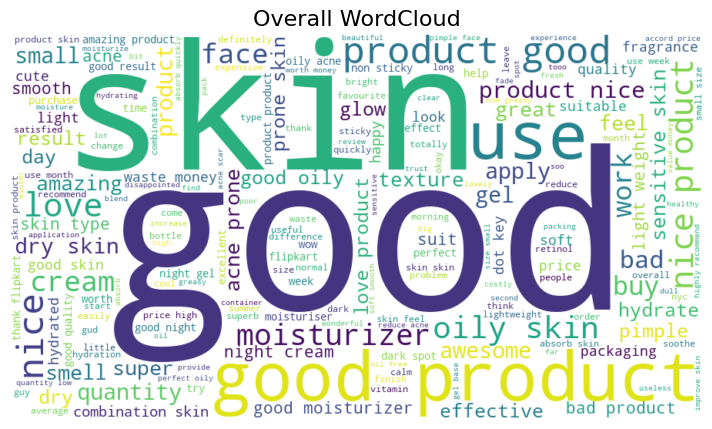

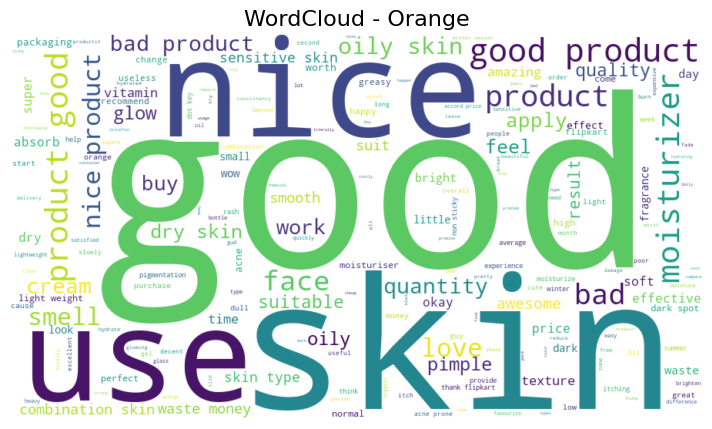

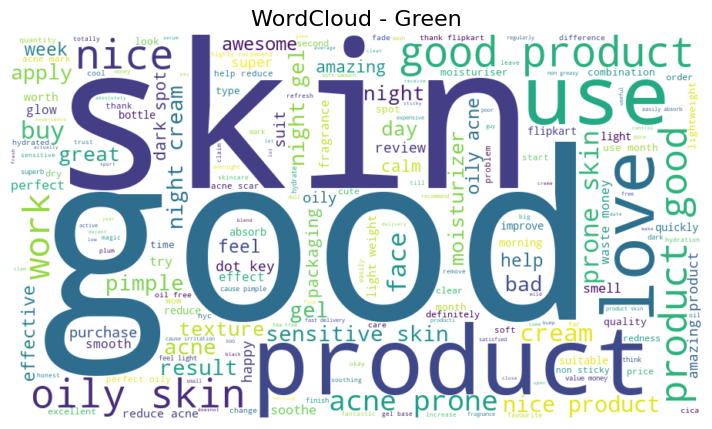

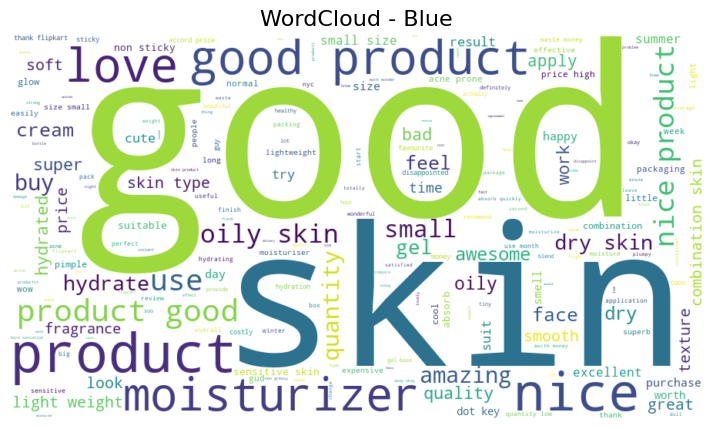

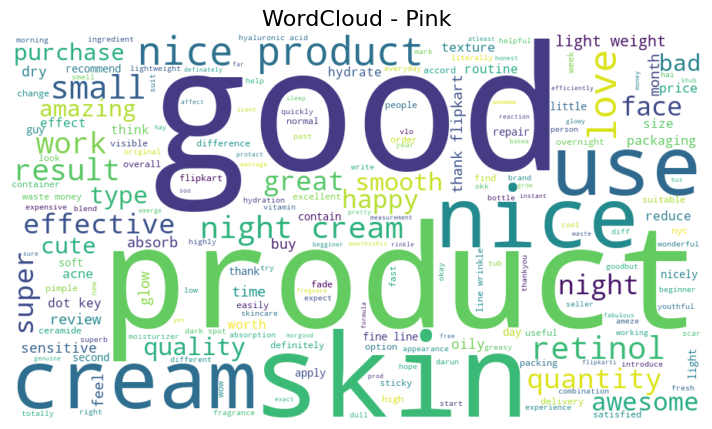

In [135]:
# WordClouds for Overall + Each Moisturizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(text, title):
    wc = WordCloud(width=900, height=500, background_color="white").generate(" ".join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# Overall
show_wordcloud(df['clean_text'], "Overall WordCloud")

# For each moisturizer
for v in variants:
    show_wordcloud(variant_dfs[v]['clean_text'], f"WordCloud - {v}")

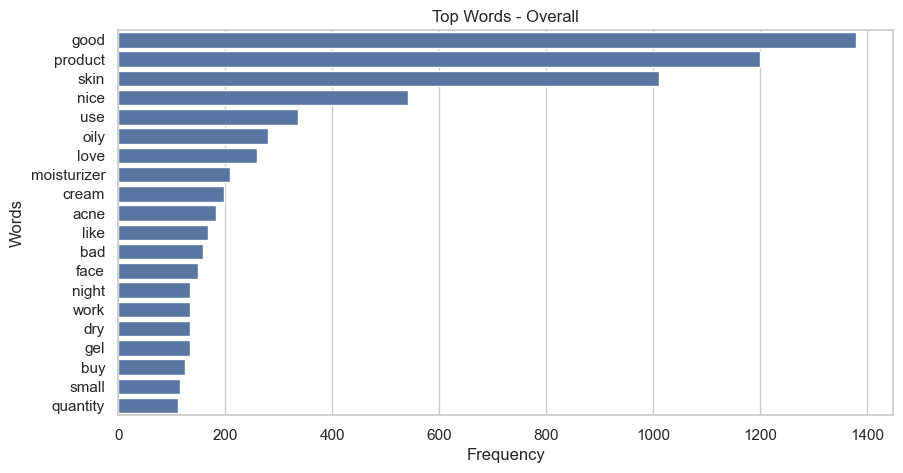

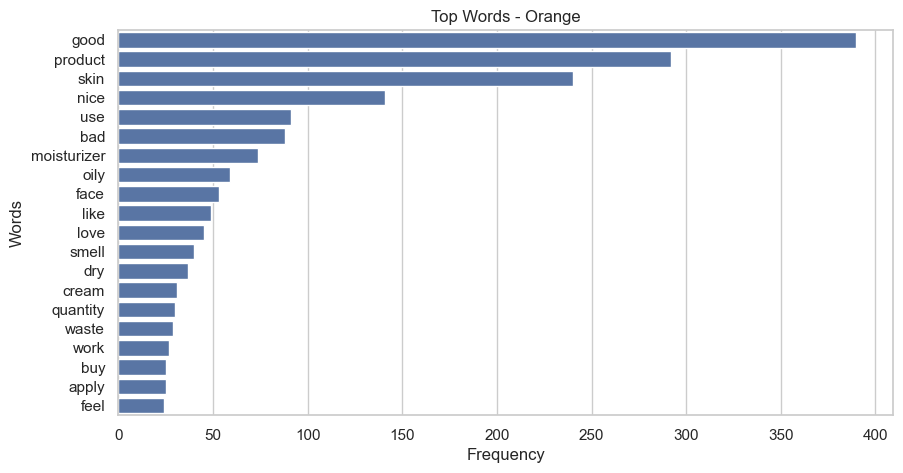

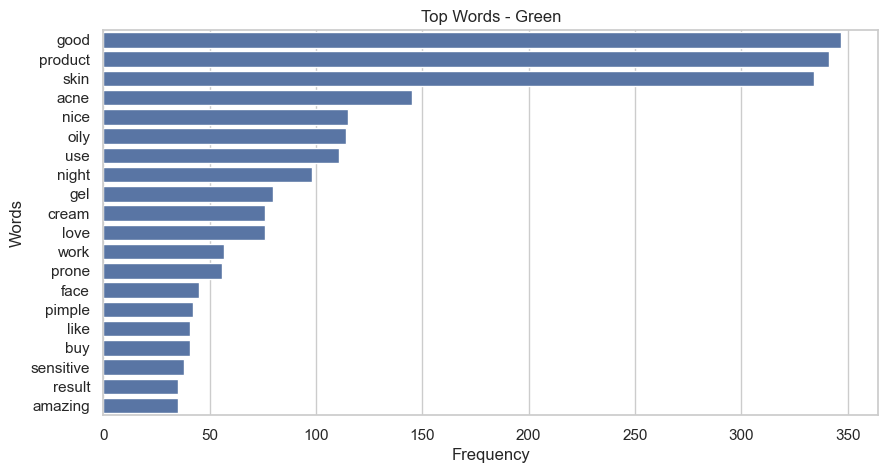

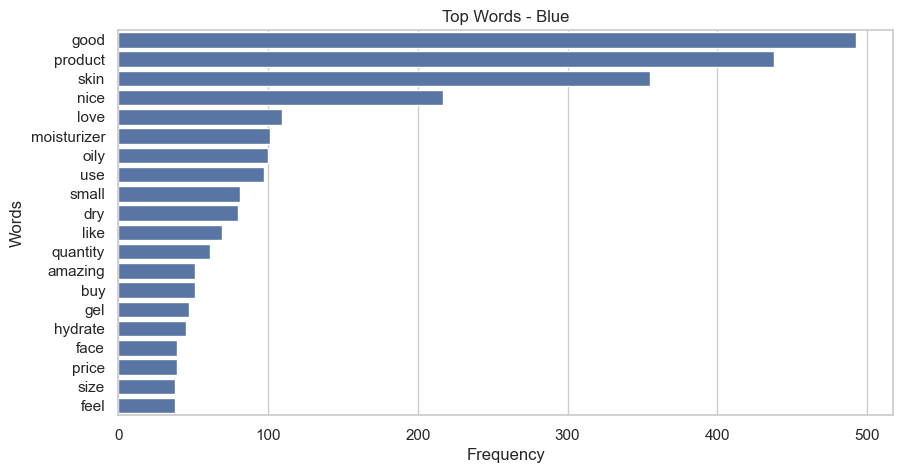

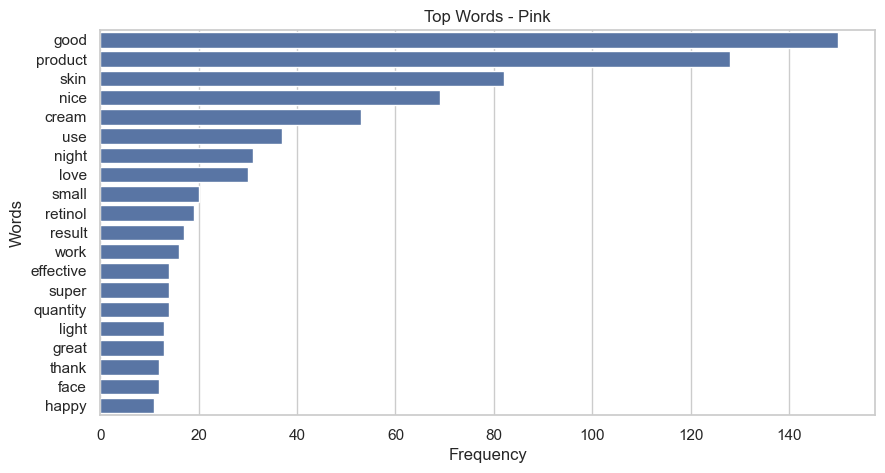

In [143]:
# Word Frequency Bar Plot (Top 20 Words per Moisturizer)

from collections import Counter
import seaborn as sns

def plot_top_words(text_series, title):
    words = " ".join(text_series).split()
    freq = Counter(words).most_common(20)
    words, counts = zip(*freq)

    plt.figure(figsize=(10,5))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

# Overall
plot_top_words(df['clean_text'], "Top Words - Overall")

# Each moisturizer
for v in variants:
    plot_top_words(variant_dfs[v]['clean_text'], f"Top Words - {v}")

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/1709510428.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="word", x="count", data=df_words, palette="viridis")


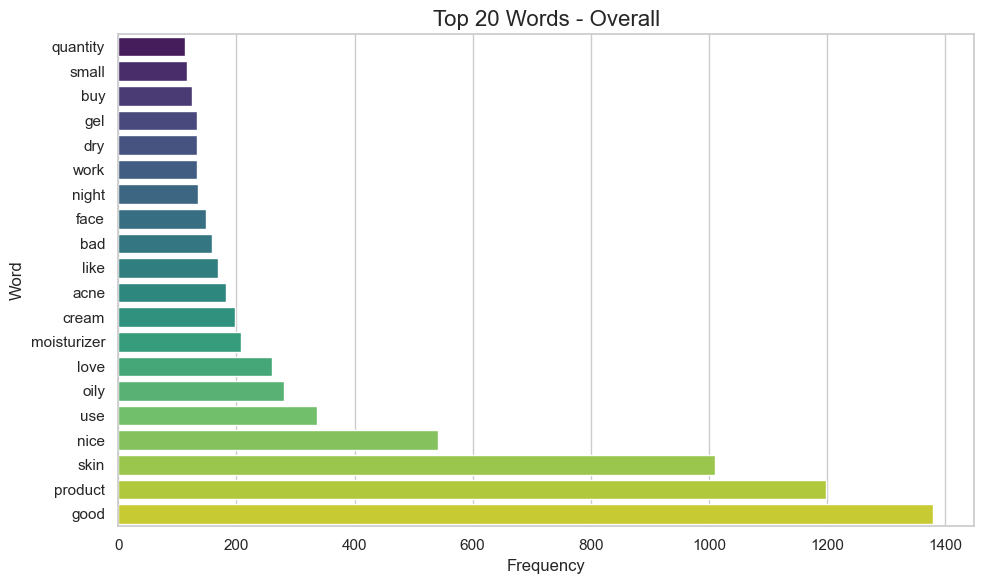

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/1709510428.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="word", x="count", data=df_words, palette="viridis")


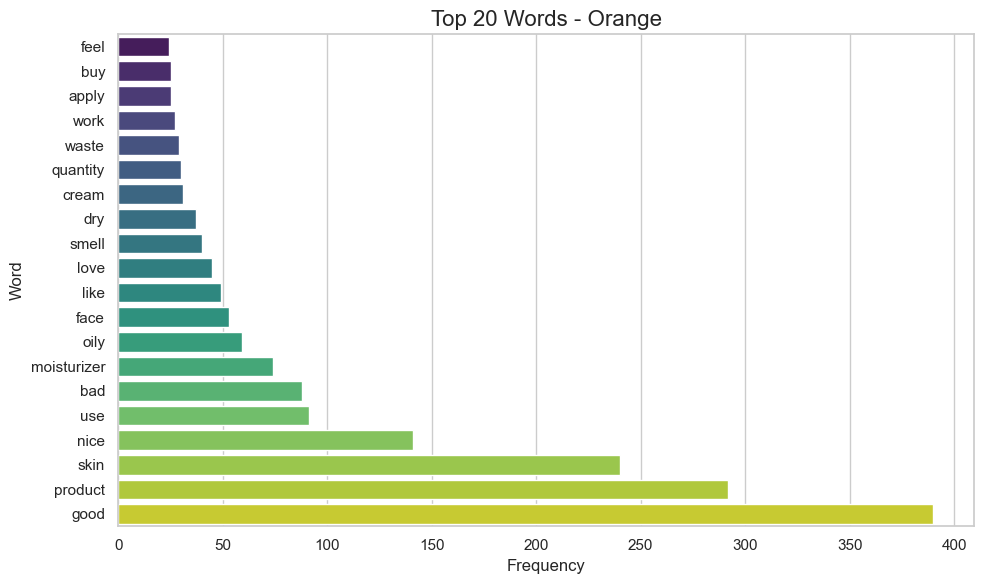

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/1709510428.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="word", x="count", data=df_words, palette="viridis")


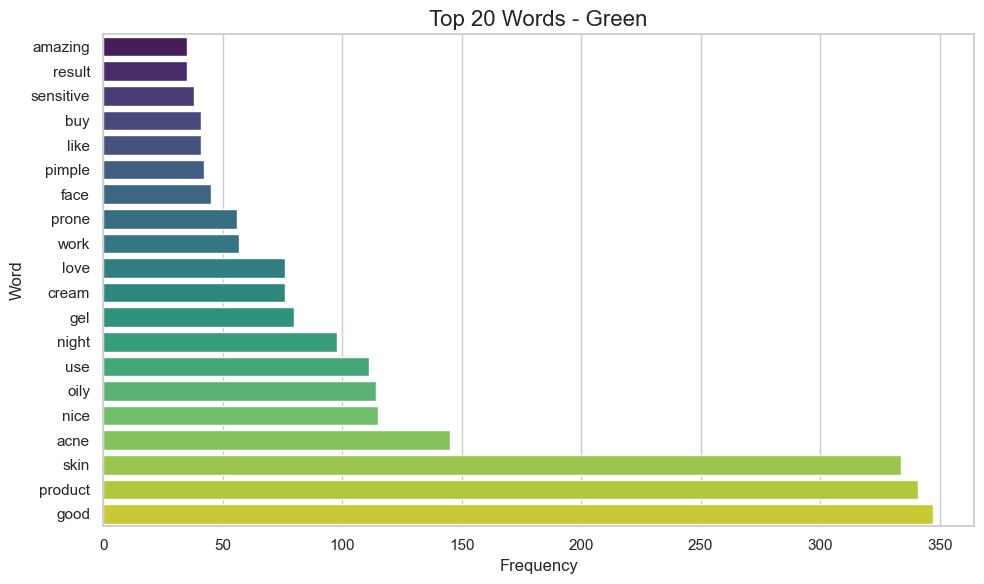

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/1709510428.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="word", x="count", data=df_words, palette="viridis")


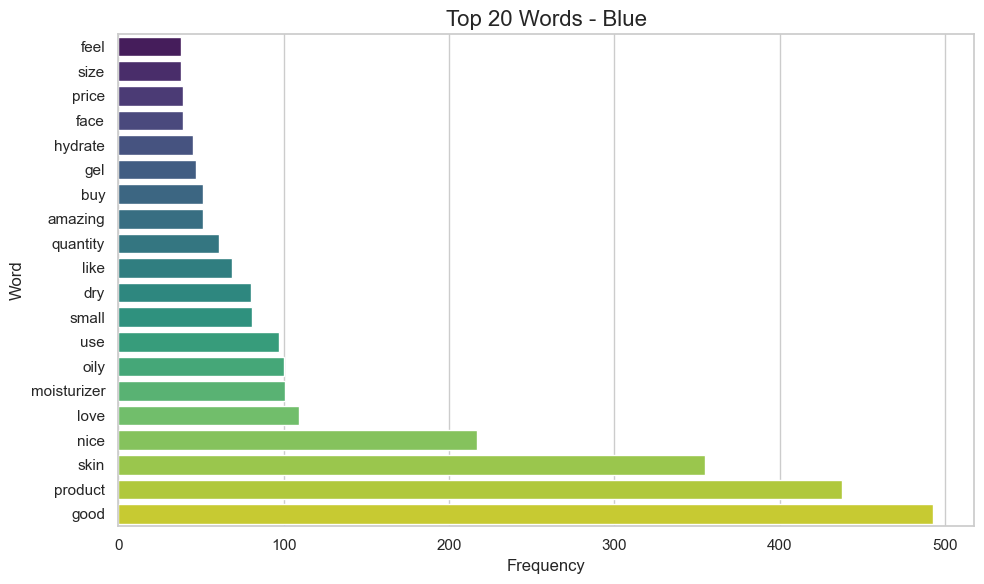

/var/folders/n2/91rm2zbs4bbf9yp2xnfvm8bm0000gn/T/ipykernel_34428/1709510428.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="word", x="count", data=df_words, palette="viridis")


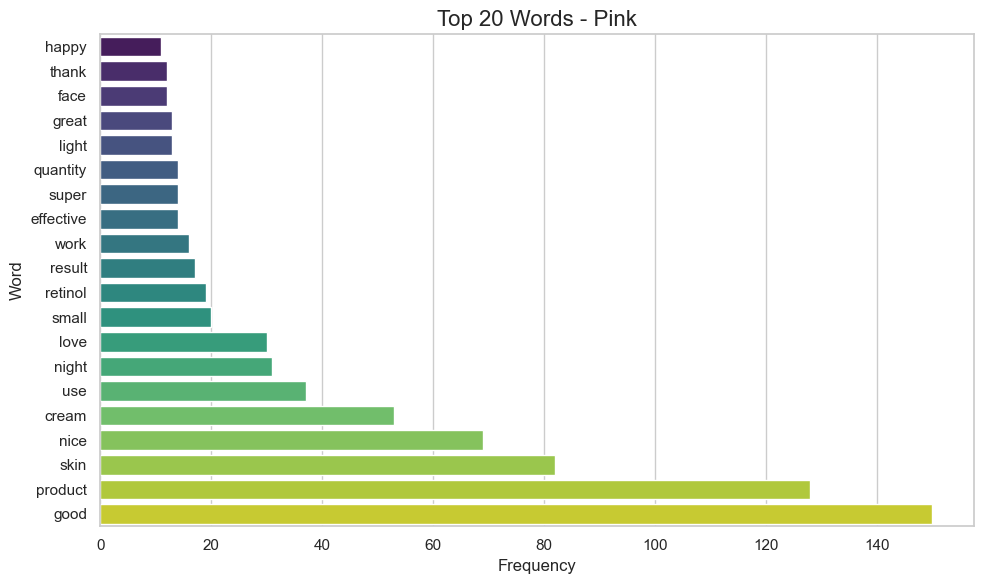

In [147]:
from collections import Counter
import pandas as pd

# overall
overall_words = " ".join(df['clean_text']).split()
overall_freq = Counter(overall_words)
overall_freq_df = pd.DataFrame(overall_freq.most_common(50), columns=['word', 'count'])
overall_freq_df.to_excel("overall_word_frequency.xlsx", index=False)

# per moisturizer
variant_freq_tables = {}

for v in variants:
    words = " ".join(variant_dfs[v]['clean_text']).split()
    freq = Counter(words)
    freq_df = pd.DataFrame(freq.most_common(50), columns=['word', 'count'])
    freq_df.to_excel(f"word_freq_{v}.xlsx", index=False)
    variant_freq_tables[v] = freq_df


import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

def plot_top_words(df_words, title):
    plt.figure(figsize=(10, 6))
    df_words = df_words.head(20).sort_values(by="count", ascending=True)
    
    sns.barplot(y="word", x="count", data=df_words, palette="viridis")
    
    plt.title(title, fontsize=16)
    plt.xlabel("Frequency", fontsize=12)
    plt.ylabel("Word", fontsize=12)
    plt.tight_layout()
    plt.show()

# overall
plot_top_words(overall_freq_df, "Top 20 Words - Overall")

# per moisturizer
for v in variants:
    plot_top_words(variant_freq_tables[v], f"Top 20 Words - {v}")



In [139]:
df.to_excel("cleaned_reviews.xlsx", index=False)